In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [29]:
from sklearn.datasets import make_blobs

# random 생성하기
X, y = make_blobs(n_samples=1000,
                  n_features=64,
                  centers=10, # 일종의 label
                  center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [30]:
X[0]

array([ 0.46221231,  2.25386422,  0.90509262,  0.45969437, -2.73648295,
       -0.32214352, -0.96347833,  0.11769775,  0.11649349, -0.92692991,
       -0.92999179,  0.76778492, -1.4769567 , -0.13954951, -0.08664628,
       -0.54140162, -2.56316031, -0.49706675, -0.67233857, -1.30375793,
        0.46181327,  0.44566249, -0.46385965, -0.56809685, -0.18549775,
        1.94547238,  0.60954046,  0.30185434, -0.75766302, -0.33760502,
        1.84158449, -1.12733093, -1.190141  ,  1.43905762,  0.4239339 ,
       -1.93603742, -2.38834805, -0.74594844, -1.1162604 , -1.21866282,
        0.31963978,  0.86814321,  0.87549705, -0.56051973, -0.05477809,
       -0.77884908, -2.71837779,  0.47115039,  0.63382226, -0.59320543,
        0.17890359,  0.08187419,  1.03134845,  0.63372039, -1.14011525,
        1.16796114, -0.90089351,  2.13244527, -0.24815986,  0.79451585,
        0.1544135 , -0.6783552 , -0.09916629, -1.5061253 ])

In [31]:
y[0:5]

array([7, 3, 5, 1, 7])

### Visualize

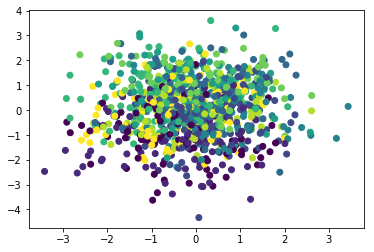

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

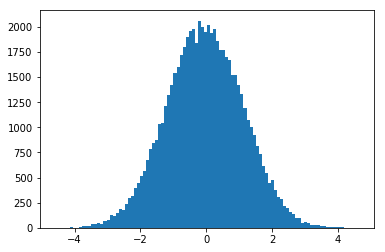

In [33]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [34]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

## Define Activate Functions

### Sigmoid

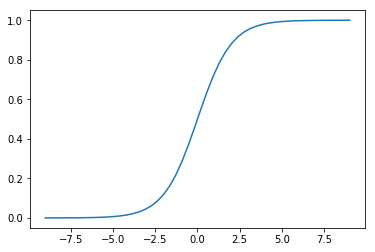

In [35]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

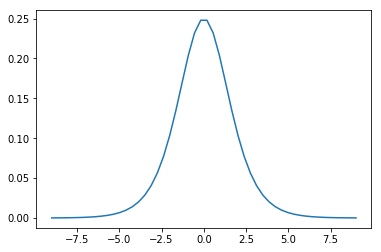

In [36]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

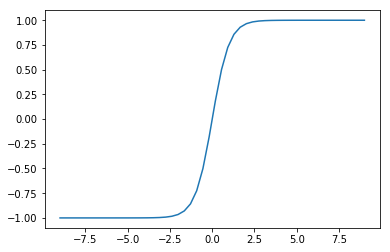

In [37]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

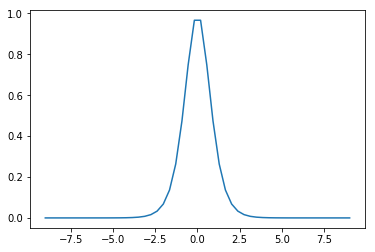

In [38]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

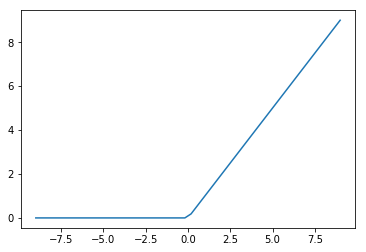

In [39]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

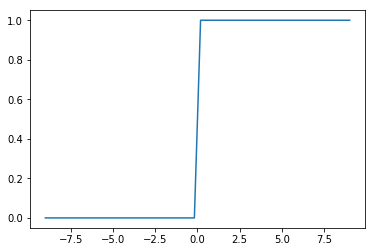

In [40]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Plot

In [41]:
def plot_w(ws, range_):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(ws[0].ravel(), bins=100, range=range_)
    axes[1].hist(ws[1].ravel(), bins=100, range=range_)
    axes[2].hist(ws[2].ravel(), bins=100, range=range_)
    axes[3].hist(ws[3].ravel(), bins=100, range=range_)
    axes[4].hist(ws[4].ravel(), bins=100, range=range_)

In [42]:
#activation 시각화

def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)

In [52]:
# back prop 시각화; delta

def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)

In [44]:
def plot_ds(ds, range_=None, exclude=0.0):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(ds[4][(ds[4] > exclude) | (ds[4] < -exclude)], bins=100, range=range_)
    axes[1].hist(ds[3][(ds[3] > exclude) | (ds[3] < -exclude)], bins=100, range=range_)
    axes[2].hist(ds[2][(ds[2] > exclude) | (ds[2] < -exclude)], bins=100, range=range_)
    axes[3].hist(ds[1][(ds[1] > exclude) | (ds[1] < -exclude)], bins=100, range=range_)
    axes[4].hist(ds[0][(ds[0] > exclude) | (ds[0] < -exclude)], bins=100, range=range_)

### Build a Model

In [45]:
# 10개 정도로 놓으면 확실한 차이가 나타남. 집에서 해보기!

def train(X, y, num_epoch, learning_rate, ws, bs, activation, activation_derivative):
    w1, w2, w3, w4, w5 = ws[0], ws[1], ws[2], ws[3], ws[4]
    b1, b2, b3, b4, b5 = bs[0], bs[1], bs[2], bs[3], bs[4]

    history = []
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = sigmoid(z5)

        y_predict = np.argmax(a5, axis=1)
        error = (y_predict != y).mean()

        history.append({
            'epoch': epoch,
            'error': error
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} error = {1:.5f}".format(epoch, error))

        if error < 0.01:
            break

        d5 = (a5 - y_hot)

        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} error = {1:.5f}".format(epoch, error))

    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    
    as_ = [a1, a2, a3, a4, a5]
    dzs = [dz2, dz3, dz4, dz5]
    ds = [d5, d4, d3, d2, d1]

    return error, ws, bs, as_, dzs, ds, history

### Case 1 - Small Random Number + Sigmoid

In [46]:
# Write your code here!

# input layer = 64, hidden layer 3개; 100, label = 10
w1 = np.random.randn(64, 100) * 0.05
w2 = np.random.randn(100, 100) * 0.05
w3 = np.random.randn(100, 100) * 0.05
w4 = np.random.randn(100, 100) * 0.05
w5 = np.random.randn(100, 10) * 0.05

# bias는 큰 영향은 없으므로 그냥 0으로 초기화
b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1, w2, w3, w4, w5]
bs = [b1, b2, b3, b4, b5]

num_epoch = 1000
learning_rate = 0.0003
error, ws, bs, as_, dzs, ds, sigmoid_history = \
    train(X, y, num_epoch, learning_rate, 
          ws, bs, activation=sigmoid, activation_derivative=sigmoid_derivative)

  0 error = 0.90000
100 error = 0.81500
200 error = 0.77800
300 error = 0.74100
400 error = 0.70500
500 error = 0.68200
600 error = 0.65500
700 error = 0.62500
800 error = 0.58800
900 error = 0.55900
----------------------------------------
999 error = 0.52800


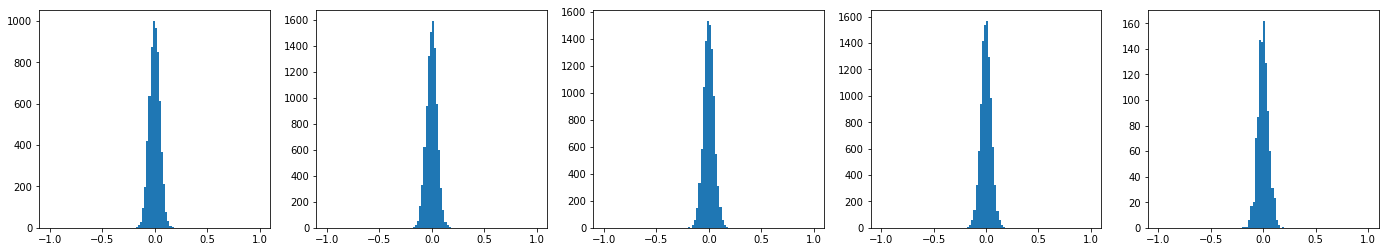

In [47]:
plot_w(ws, range_=(-1.0, +1.0))

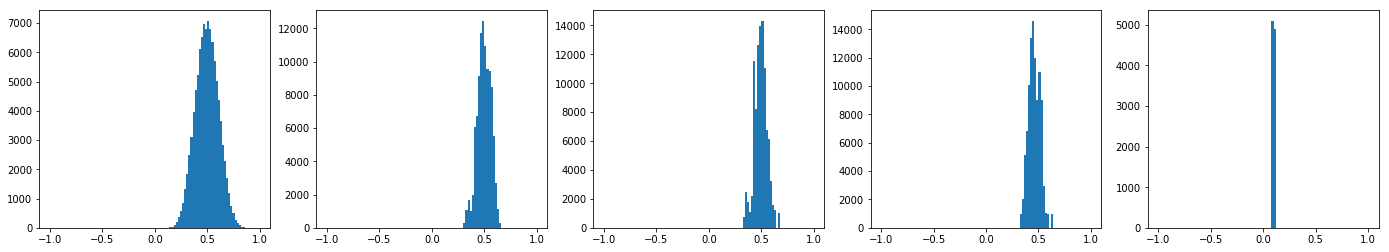

In [49]:
plot_a(as_, (-1.0, +1.0))

# layer가 진행될수록 분산이 작아지다가 0이 되는 모습을 확인

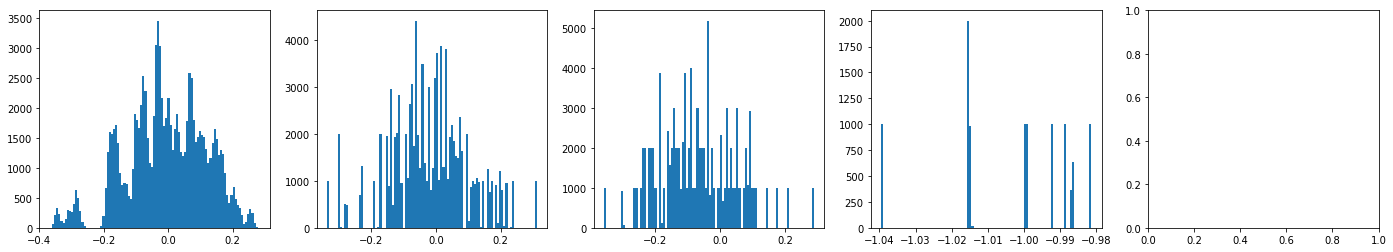

In [51]:
plot_dzs(dzs)

# sigmoid + random small number 초기화에는 기본적으로 문제가 있다!

### Case 2 - Small Random Number + tanh

In [77]:
# Write your code here!

# input layer = 64, hidden layer 3개; 100, label = 10
w1 = np.random.randn(64, 100) * 0.05
w2 = np.random.randn(100, 100) * 0.05
w3 = np.random.randn(100, 100) * 0.05
w4 = np.random.randn(100, 100) * 0.05
w5 = np.random.randn(100, 10) * 0.05

# bias는 큰 영향은 없으므로 그냥 0으로 초기화
b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1, w2, w3, w4, w5]
bs = [b1, b2, b3, b4, b5]

num_epoch = 1000
learning_rate = 0.0003
error, ws, bs, as_, dzs, ds, tanh_history = \
    train(X, y, num_epoch, learning_rate, 
          ws, bs, activation=tanh, activation_derivative=tanh_derivative)

  0 error = 0.90200
----------------------------------------
 85 error = 0.00800


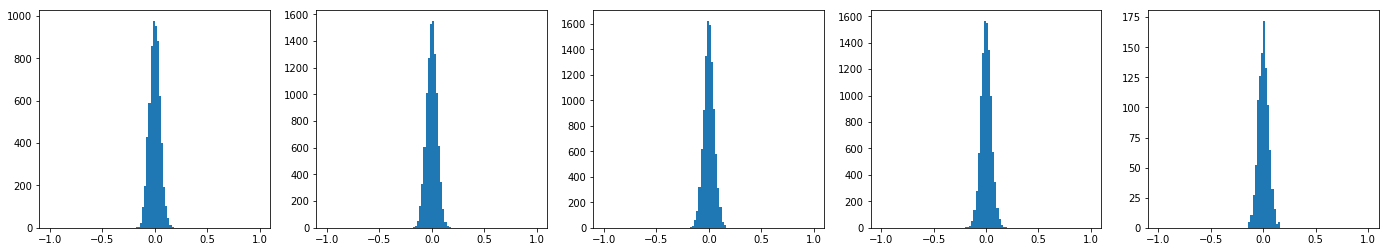

In [78]:
plot_w(ws, range_=(-1.0, +1.0))

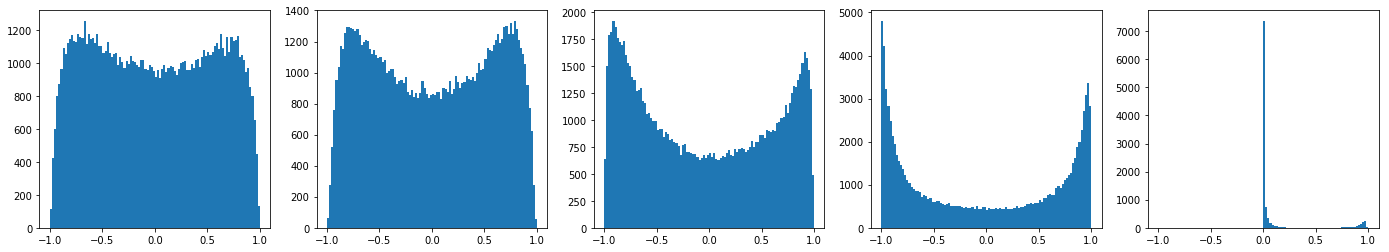

In [79]:
plot_a(as_, (-1.0, +1.0))

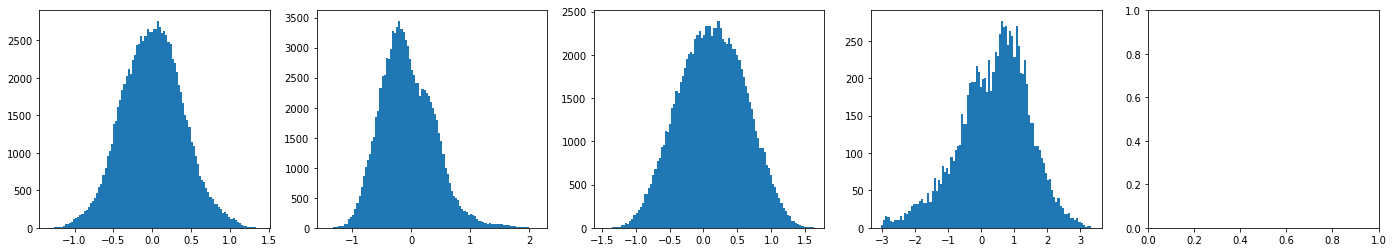

In [80]:
plot_dzs(dzs)

# deep layer들을 중점적으로 확인해야 한다.

### Case 3 - Xavior Initialization + tanh

In [82]:
# Write your code here!

# input layer = 64, hidden layer 3개; 100, label = 10
#w1 = np.random.randn(64, 100) * 0.05
#w2 = np.random.randn(100, 100) * 0.05
#w3 = np.random.randn(100, 100) * 0.05
#w4 = np.random.randn(100, 100) * 0.05
#w5 = np.random.randn(100, 10) * 0.05

w1 = np.random.uniform(low=-np.sqrt(6 / (64 + 100)),
                      high=np.sqrt(6 / (64 + 100)),
                      size = (64, 100))
w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)),
                      high=np.sqrt(6 / (100 + 100)),
                      size = (100, 100))
w3 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)),
                      high=np.sqrt(6 / (100 + 100)),
                      size = (100, 100))
w4 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)),
                      high=np.sqrt(6 / (100 + 100)),
                      size = (100, 100))
w5 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)),
                      high=np.sqrt(6 / (100 + 100)),
                      size = (100, 10))

# bias는 큰 영향은 없으므로 그냥 0으로 초기화
b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1, w2, w3, w4, w5]
bs = [b1, b2, b3, b4, b5]

num_epoch = 1000
learning_rate = 0.0003
error, ws, bs, as_, dzs, ds, tanh_history = \
    train(X, y, num_epoch, learning_rate, 
          ws, bs, activation=tanh, activation_derivative=tanh_derivative)

  0 error = 0.91200
----------------------------------------
 15 error = 0.00700


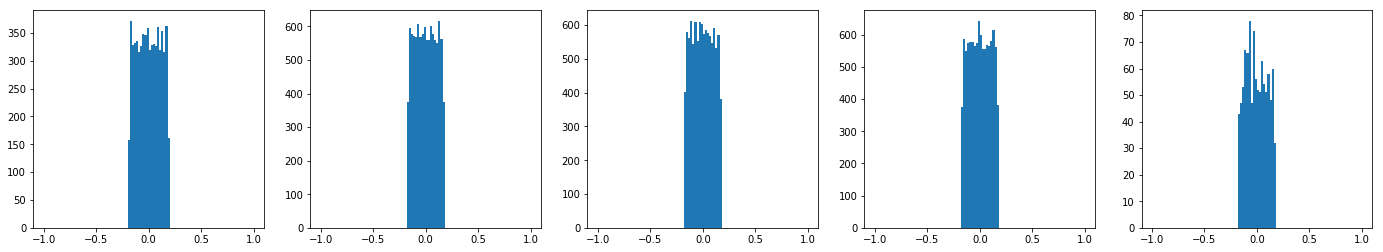

In [83]:
plot_w(ws, range_=(-1.0, +1.0))

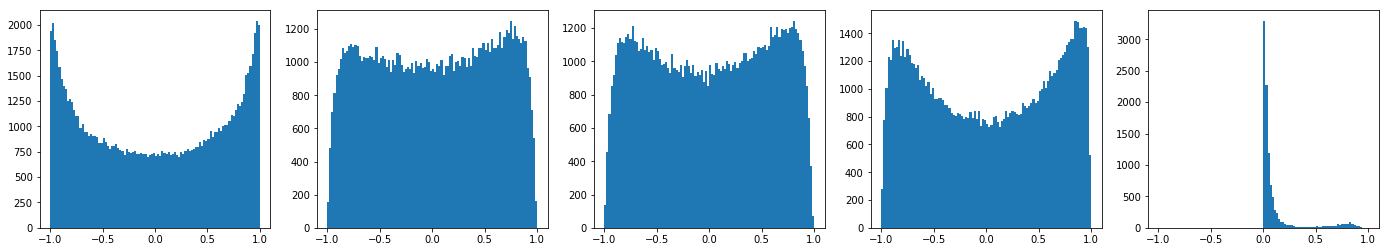

In [84]:
plot_a(as_, (-1.0, +1.0))

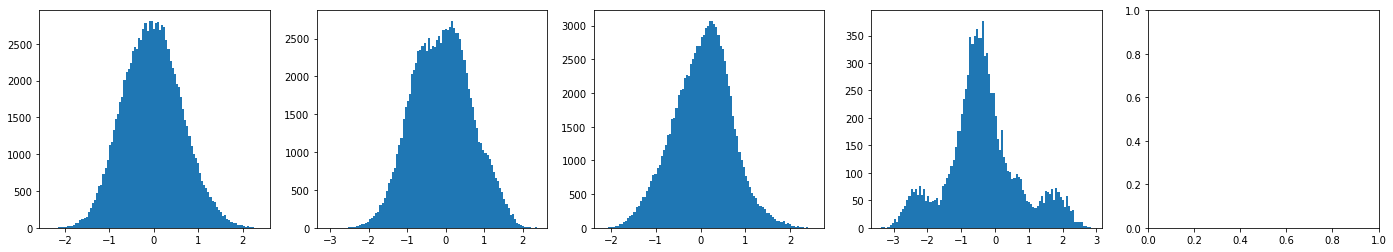

In [85]:
plot_dzs(dzs)

# deep layer들을 중점적으로 확인해야 한다.

### Case 4 - Xavior Initialization + ReLU

In [31]:
# Write your code here!

### Case 4 - He Initialization + ReLU

In [32]:
# Write your code here!